<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Reducci%C3%B3n_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔸 PCA**

> La idea clave detrás de PCA es identificar las direcciones (componentes) en las que los datos varían más y reducir la dimensionalidad preservando la mayor parte posible de esa variabilidad.



Implementación usando solo Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pca(X, n_components):
  x_meaned = x - np.mean(x, axis=0)
  covariance_matrix = np.cov(x_meaned, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
  sorted_index = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_index]
  sorted_eigenvectors = eigenvectors[:, sorted_index]
  eigenvector_subset = sorted_eigenvectors[:, :n_components]
  x_reduced = np.dot(x_meaned, eigenvector_subset)
  return x_reduced, sorted_eigenvalues[:n_components]

In [3]:
#Se genera datos (10 muestras, 5 características)
np.random.seed(42)
x = np.random.rand(10, 5)

In [4]:
#Se aplica PCA para reducir a dos variantes
x_pca, explained_variance = pca(x, n_components=2)

In [5]:
print("Datos proyectados:")
print(x_pca)
print("Varianza explicada por los componentes principales:")
print(explained_variance)

Datos proyectados:
[[ 0.56141715  0.16712381]
 [ 0.01600634 -0.61358387]
 [ 0.88469781 -0.08312493]
 [ 0.17512929 -0.14441486]
 [-0.25376338  0.04229751]
 [-0.09108191  0.36621103]
 [-0.7391968  -0.24596106]
 [-0.44240949  0.26632862]
 [-0.09652537  0.01912396]
 [-0.01427363  0.2259998 ]]
Varianza explicada por los componentes principales:
[0.2170174  0.08343888]


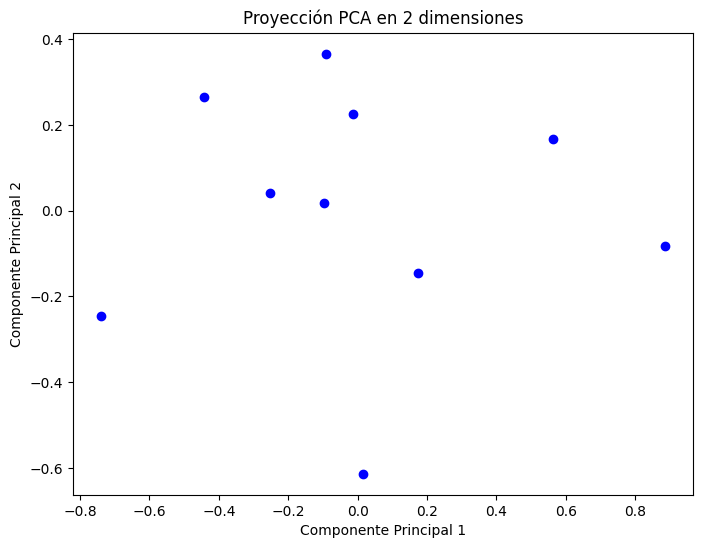

In [8]:
#Grafico
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c='blue', marker='o')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección PCA en 2 dimensiones')
plt.show()

Implementación usando Sklearn

In [16]:
!pip install --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [4]:
#Se crea corpus para Word2Vec
sentences = [
    ['dog', 'barks', 'loudly'],
    ['cat', 'meows', 'softly'],
    ['bird', 'chirps', 'happily'],
    ['dog', 'runs', 'quickly'],
    ['cat', 'jumps', 'quietly'],
    ['bird', 'flies', 'gracefully'],
    ['man', 'runs', 'fast'],
    ['woman', 'walks', 'quickly'],
    ['boy', 'jumps', 'high'],
    ['girl', 'laughs', 'softly']]


In [5]:
#Se entrena el modelo
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

words = list(model.wv.key_to_index)
word_vectors = np.array([model.wv[word] for word in words])

In [6]:
#Se reduce a 2 dimensiones con PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

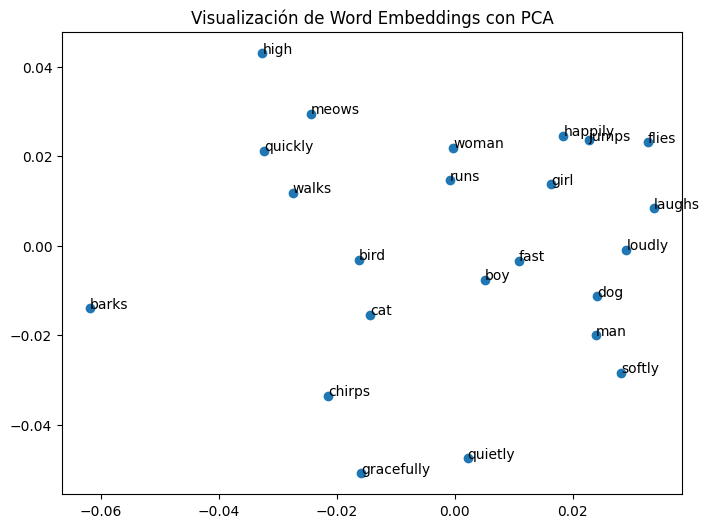

In [7]:
#Grafico
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Visualización de Word Embeddings con PCA')
plt.show()

# **🔸 t-SNE**



> El t-SNE es muy útil en procesamiento del lenguaje natural (NLP) para visualizar la relación entre embeddings de palabras, que son representaciones vectoriales que capturan el significado de las palabras en un espacio de alta dimensionalidad.



In [8]:
#Se crea corpus para Word2Vec
sentences = [
    ['dog', 'barks', 'loudly'],
    ['cat', 'meows', 'softly'],
    ['bird', 'chirps', 'happily'],
    ['dog', 'runs', 'quickly'],
    ['cat', 'jumps', 'quietly'],
    ['bird', 'flies', 'gracefully'],
    ['man', 'runs', 'fast'],
    ['woman', 'walks', 'quickly'],
    ['boy', 'jumps', 'high'],
    ['girl', 'laughs', 'softly']]

In [9]:
#Se entrena el modelo
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

words = list(model.wv.key_to_index)
word_vectors = np.array([model.wv[word] for word in words])

In [11]:
#Se reduce a 20 dimensiones con PCA
pca = PCA(n_components=20)
word_vectors_pca = pca.fit_transform(word_vectors)

#Se reduce a 2 dimensiones con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=15)
word_embeddings_tsne = tsne.fit_transform(word_vectors_pca)

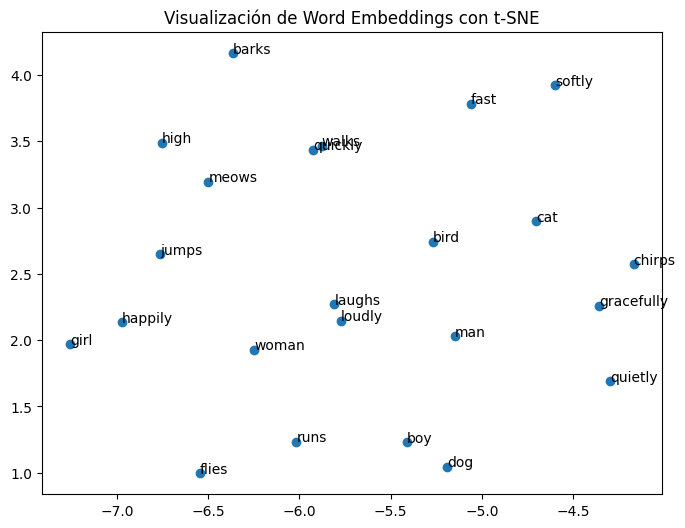

In [12]:
#Grafico
plt.figure(figsize=(8, 6))
plt.scatter(word_embeddings_tsne[:, 0], word_embeddings_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_embeddings_tsne[i, 0], word_embeddings_tsne[i, 1]))
plt.title('Visualización de Word Embeddings con t-SNE')
plt.show()

# **🔸 UMAP**

In [13]:
!pip install umap-learn scikit-learn

In [15]:
#Se aplica UMAP para reducir a 2D
import umap
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embeddings_2d = umap_model.fit_transform(word_vectors_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


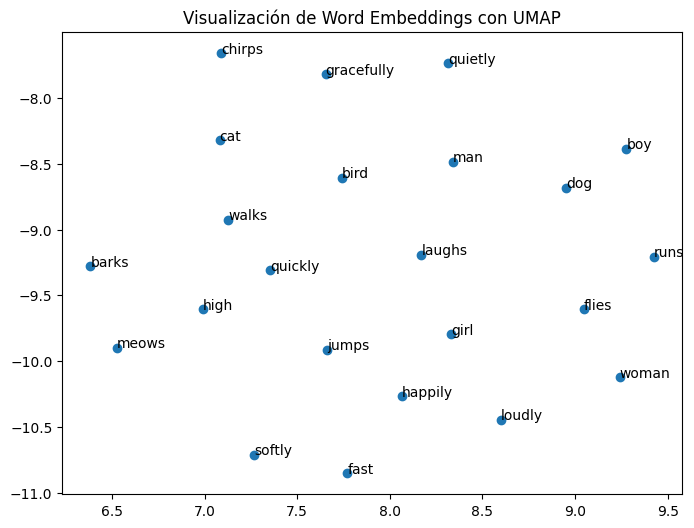

In [16]:
#Grafico
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title('Visualización de Word Embeddings con UMAP')
plt.show()